In [11]:
# THE NORMAL EQUATION
# Normal equation minimizes directly the Cost Function (Closed Form)

import numpy as np

# generate some ramdom data:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 3x + 4 + noise

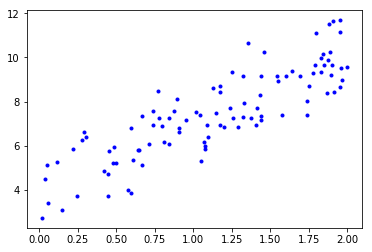

In [13]:
# Plot generated data:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(X,y, "b.")
plt.show()

In [14]:
# Compute W data using the Normal Equation:
# W or Theta_hat = (X.T . X)^-1 . X.T . y
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0803435 ],
       [2.97970774]])

In [15]:
# Now use theta hat to compute predictions:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.0803435 ],
       [10.03975898]])

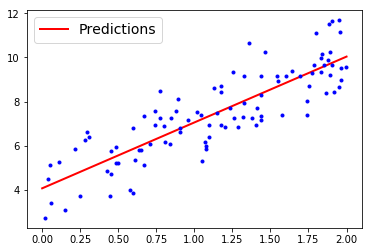

In [25]:
# plot results:
plt.plot(X_new, y_predict, "r-", linewidth=2,label="Predictions")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [20]:
# Lets do the same using sklearn library
from sklearn.linear_model import LinearRegression

lin_Reg = LinearRegression()
lin_Reg.fit(X,y)
lin_Reg.intercept_, lin_Reg.coef_

(array([4.0803435]), array([[2.97970774]]))

In [21]:
# similar values than the Normal Equation
# test their predictions:
y_pred_lr = lin_Reg.predict(X_new)
y_pred_lr

array([[ 4.0803435 ],
       [10.03975898]])

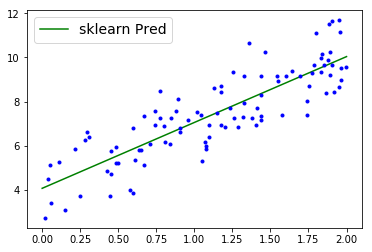

In [26]:
#plot it:
plt.plot(X_new, y_pred_lr, "g", label="sklearn Pred")
plt.plot(X, y, "b.")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [29]:
# GRADIENT DESCENT
# Batch gradient descent example:
# Hyperparameters:
eta = 0.1 # learning rate
n_iterations = 1000 
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range (n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta

array([[4.0803435 ],
       [2.97970774]])

In [30]:
# using Stochastic Gradient Descent
# Hyperparameters:
n_epochs=50
t0,t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients
        
theta

array([[4.0036896 ],
       [3.04055166]])

In [ ]:
# using sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta=0.1)
sgd_reg.fit(X, y.ravel())

sg